In [ ]:
import sympy

In [1]:
import numpy as np
from scipy.spatial.transform import Rotation as R

In [2]:
import numpy as np

def rotation_matrix(axis, theta):
    """
    Calculates the principal axis rotations for Euler angles given a set of axes (3, 2, 1) and rotation angles in degrees.

    Parameters:
        axes (tuple): A tuple specifying the order of rotation axes.
        degree (tuple): A tuple of rotation angles in degrees corresponding to the specified axes.

    Returns:
        np.ndarray: The 3x3 rotation matrix representing the rotation.
    """
    
    theta = np.deg2rad(theta)

    if axis == '1':
        rotation = np.array([[1, 0, 0],
                            [0, np.cos(theta), np.sin(theta)],
                            [0, -np.sin(theta), np.cos(theta)]])
    elif axis == '2':
        rotation = np.array([[np.cos(theta), 0, -np.sin(theta)],
                                [0, 1, 0],
                                [np.sin(theta), 0, np.cos(theta)]])
    elif axis == '3':
        rotation = np.array([[np.cos(theta), np.sin(theta), 0],
                                [-np.sin(theta), np.cos(theta), 0],
                                [0, 0, 1]])
    else:
        raise ValueError("Invalid axis specified. Valid axis values are 1, 2, or 3.")

    return rotation


In [3]:
from functools import reduce

def compose_rotation(angles, sequence):
    rotations = [rotation_matrix(axis, theta) for (axis, theta) in zip(sequence, angles)]
    return reduce(np.matmul, rotations[::-1])
    

In [4]:
def euler_angles(dcm, sequence):
    angles = []
    if sequence == '321':
        psi = np.arctan(dcm[0][1] / dcm[0][0])
        theta = -np.arcsin(dcm[0][2])
        phi = np.arctan(dcm[1][2] / dcm[2][2])
        return [psi, theta, phi]
        
    if sequence == '313':
        psi = np.arctan(dcm[2][0] / -dcm[2][1])
        theta = np.arccos(dcm[2][2])
        phi = np.arctan(dcm[0][2] / dcm[1][2])
        return [psi, theta, phi]
    
def get_prv(dcm):
    
    phi = np.arccos(0.5*(np.trace(dcm)-1))
    e = np.array([dcm[1][2] - dcm[2][1], dcm[2][0] - dcm[0][2], dcm[0][1] - dcm[1][0]])/(2*np.sin(phi))
    
    return phi, e
        

    
    

In [5]:
bn = compose_rotation([20,10,-10],'321')
print(bn)

print(get_prv(bn))

print(list(map(lambda x: np.round(np.rad2deg(x),3), euler_angles(bn, '313'))))
print(np.round(euler_angles(bn,'313'),4))

# check

bn = compose_rotation(np.rad2deg([-0.4287,  0.2462,  0.7931]), '313')
print(np.rad2deg(euler_angles(bn, '321')))

[[ 0.92541658  0.33682409 -0.17364818]
 [-0.36515929  0.91510341 -0.17101007]
 [ 0.10130573  0.2216648   0.96984631]]
(0.43898588626075874, array([-0.46194682,  0.32345865,  0.82582058]))
[-24.561, 14.106, 45.439]
[-0.4287  0.2462  0.7931]
[ 20.00146269 -10.00059873   9.99965301]


In [6]:
bn = np.array(
    [[1,0,0],
    [0,0,1],
    [0,-1,0]]
)
result = bn @ bn
print(get_prv(result))
print(result)

(3.141592653589793, array([0., 0., 0.]))
[[ 1  0  0]
 [ 0 -1  0]
 [ 0  0 -1]]


In [7]:
bn = compose_rotation([10,20,30], '321')
rn = compose_rotation([-5,5,5],'321')
omega = np.array([1,0,0])
br = bn @ omega
print(bn)
print(br)


# print(list(map(lambda x: np.round(np.rad2deg(x),3), euler_angles(br, '321'))))

[[ 0.92541658  0.16317591 -0.34202014]
 [ 0.01802831  0.88256412  0.46984631]
 [ 0.37852231 -0.44096961  0.81379768]]
[0.92541658 0.01802831 0.37852231]


In [8]:
t0, tf = 0, 42
step = 0.01
length = int(round(tf-t0)/step)
time = np.linspace(t0, tf+step, length)

time

array([0.00000000e+00, 1.00047630e-02, 2.00095261e-02, ...,
       4.19899905e+01, 4.19999952e+01, 4.20100000e+01])

In [9]:
bn = compose_rotation([40,30,80],'321')
t0, tf = 0, 42
step = 0.01
length = int(round(tf-t0)/step)
time = np.linspace(t0, tf+step, length)


def get_body_ypr(t2, t3):

    return np.array(
        [[0, np.sin(t3), np.cos(t3)],
        [0, np.cos(t2)*np.cos(t3), -np.cos(t2)*np.sin(t3)],
        [np.cos(t2), np.sin(t2)*np.sin(t3), np.sin(t2)*np.cos(t3)]]
    )/np.cos(t2)

results = []
angles = np.deg2rad([40,30,80])
omega_angle = np.deg2rad(20)

for t in time:
    omega = np.array([np.sin(0.1*t), 0.01, np.cos(0.1*t)]) * omega_angle
    body_ypr = get_body_ypr(angles[1], angles[2])
    euler_rate = body_ypr @ omega
    angles += step * euler_rate
    
print(angles)
print(np.linalg.norm(angles))

[2.40022067 0.97077517 5.54790455]
6.12231236011601


In [10]:
phi = np.arccos(0.5*(0.925417 -0.521181-0.492404-1))
e = np.array([0.852869+0.784102, 0.377786-0.173648, 0.336824-0.0296956])/(2*np.sin(phi))

In [86]:
from sympy.interactive.printing import init_printing
init_printing(use_unicode=False, wrap_line=False)
from sympy.matrices import Matrix, zeros, ones, diag, GramSchmidt
from sympy import cos, sin, gcd, Symbol



In [87]:
theta = Symbol('theta')
phi = Symbol('phi')

m3 = Matrix((
    [cos(phi), sin(phi), 0],
    [-sin(phi), cos(phi), 0],
    [0,0,1]
))


m1 = Matrix((
    [1,0,0],
    [0, cos(theta), sin(theta)],
    [0, -sin(theta), cos(theta)]
))

flip = Matrix((
    [0,1,0],
    [1,0,0],
    [0,0,1]
))

m3@m1@m3


[            2                      2                                                                                    ]
[       - sin (phi)*cos(theta) + cos (phi)          sin(phi)*cos(phi)*cos(theta) + sin(phi)*cos(phi)  sin(phi)*sin(theta)]
[                                                                                                                        ]
[                                                               2           2                                            ]
[-sin(phi)*cos(phi)*cos(theta) - sin(phi)*cos(phi)         - sin (phi) + cos (phi)*cos(theta)         sin(theta)*cos(phi)]
[                                                                                                                        ]
[               sin(phi)*sin(theta)                               -sin(theta)*cos(phi)                    cos(theta)     ]

In [117]:
# defines body rotation rates

Omega = Symbol("Omega")
gamma = Symbol("gamma")

omega_s = Symbol("omega_s")
omega_t = Symbol("omega_t")
omega_g = Symbol("omega_g")

N = CoordSys3D('N')
B = CoordSys3D('B')
G = CoordSys3D('G', vector_names=["s","t","g"])
W = CoordSys3D('W')
omega = omega_s * G.s + omega_t * G.t + omega_g * G.g


# Define Moment of Inertias
I_Gs = Symbol("I_{G_s}")
I_Gt = Symbol("I_{G_t}")
I_Gg = Symbol("I_{G_g}")

I_gimbal = Matrix(
    [[I_Gs,0,0],
    [0,I_Gt,0],
    [0,0,I_Gg]])

I_Ws = Symbol("I_{W_s}")
I_Wt = Symbol("I_{W_t}")

I_wheel = Matrix(
    [[I_Ws,0,0],
    [0,I_Wt,0],
    [0,0,I_Wt]])




H_wheel = I_Ws * (omega_s + )

I_gimbal + I_wheel


[I_{G_s} + I_{W_s}          0                  0        ]
[                                                       ]
[        0          I_{G_t} + I_{W_t}          0        ]
[                                                       ]
[        0                  0          I_{G_g} + I_{W_t}]

In [114]:
omega

In [90]:
I_Gs = Symbol("I_{G_s}")
omega = Symbol("omega")



I_Gs + omega

In [19]:
r1 = R.from_euler('x', 60, degrees=True)
r2 = R.from_euler('y', -45, degrees=True)
r3 = R.from_euler('z', 30, degrees=True)



In [31]:
rotation = r1 * r2 * r3
rotation.as_matrix()

array([[ 0.61237244, -0.35355339, -0.70710678],
       [-0.28033009,  0.73919892, -0.61237244],
       [ 0.73919892,  0.5732233 ,  0.35355339]])

In [29]:
rotation.as_euler('zyx', degrees=True)

array([ 30., -45.,  60.])

In [14]:
def tilde(x):
    return np.array([
        [0, -x[2], x[1]],
        [x[2], 0, -x[0]],
        [-x[1], x[0], 0]
    ])

In [17]:
r = np.array([2,0,0])

tilde(r) @ tilde(r)

array([[ 0,  0,  0],
       [ 0, -4,  0],
       [ 0,  0, -4]])

In [18]:
2

In [19]:
a = np.array([1,2,3])
b = np.array([2,0.2,1])
c = np.array([-1, 4, -2])
d = np.array([-2,2,1])



In [21]:
ans  = np.dot(
    np.cross(a,b), np.cross(c,d))

ans2 = np.dot(a,d) * np.dot(b,c) - np.dot(a,c) * np.dot(b,d)

In [18]:
norm = np.linalg.norm
def mrp_sum(g1, g2):
    
    norm1 = norm(g1)
    norm2 = norm(g2)
    
    g_sum = ((1-norm1**2)*g2 +(1-norm2**2)*g1 - 2*np.cross(g1, g2)) / (1 + norm1**2 * norm2**2 - 2 * np.dot(g1, g2))
    return g_sum


def mrp_to_dcm(mrp):
    
    identity = np.identity(3)
    mrp_cross_matrix = tilde(mrp)
    norm_mrp = norm(mrp)
    dcm = identity + (8 * mrp_cross_matrix @ mrp_cross_matrix - 4 * (1 - norm_mrp ** 2) * mrp_cross_matrix) / \
                     ((1 + norm_mrp ** 2) ** 2)
    return dcm

def b_matrix_mrp(mrp):
    return (1-norm(mrp)**2)*np.identity(3) + 2*tilde(mrp) + 2 * np.outer(mrp, mrp)

def tilde(x):
    return np.array([
        [0, -x[2], x[1]],
        [x[2], 0, -x[0]],
        [-x[1], x[0], 0]])

def mrp_subtract(mrp1, mrp2):
    
    norm1 = norm(mrp1)
    norm2 = norm(mrp2)
    
    num = (1 - norm2**2)*norm1 - (1-norm1**2)*norm2 + 2*np.cross(mrp1, mrp2)
    denom = 1 + (norm1*norm2)**2 + 2*np.dot(mrp1, mrp2)
    
    result = num/denom
    result_norm = norm(result)
    if result_norm >= 1:
        result = -result/result_norm**2
        
    return result
    
    
def dcm2euler_param(dcm):
    
    trace = np.trace(dcm)
    b02 = 0.25 * (1 + trace)
    b12 = 0.25 * (1 + 2*dcm[0][0] - trace)
    b22 = 0.25 * (1 + 2*dcm[1][1] - trace)
    b32 = 0.25 * (1 + 2*dcm[2][2] - trace)
    
    if b02 == max(b02, b12, b22, b32):
        b0 = np.sqrt(b02)
        b1 = (dcm[1][2]-dcm[2][1]) / (4 * b0)
        b2 = (dcm[2][0]-dcm[0][2]) / (4 * b0)
        b3 = (dcm[0][1]-dcm[1][2]) / (4 * b0)
        return np.array([b0, b1, b2, b3])
    
    if b12 == max(b02, b12, b22, b32):
        b1 = np.sqrt(b12)
        b0 = (dcm[1][2]-dcm[2][1]) / (4 * b1)
        b2 = (dcm[0][1]+dcm[1][0]) / (4 * b1)
        b3 = (dcm[2][0]+dcm[0][2]) / (4 * b1)
        return np.array([b0, b1, b2, b3])
    
    if b22 == max(b02, b12, b22, b32):
        b2 = np.sqrt(b22)
        b1 = (dcm[0][1]+dcm[1][0]) / (4 * b2)
        b0 = (dcm[2][0]-dcm[0][2]) / (4 * b2)
        b3 = (dcm[1][2]+dcm[2][1]) / (4 * b2)
        return np.array([b0, b1, b2, b3])
    else:
        b3 = np.sqrt(b32)
        b1 = (dcm[2][0]+dcm[0][2]) / (4 * b3)
        b2 = (dcm[1][2]+dcm[2][1]) / (4 * b3)
        b0 = (dcm[0][1]-dcm[1][2]) / (4 * b3)
        return np.array([b0, b1, b2, b3])

def dcm2mrp(dcm):
    if np.isclose(np.trace(dcm), -1.0):
        quat = dcm2euler_param(dcm)
        sigma = quat[1:] / (1 + quat[0])
        return sigma
    trace_term = (np.trace(dcm) + 1)**0.5
    denom = (trace_term*(trace_term+2))
    num = np.array([
        dcm[1][2] - dcm[2][1],
        dcm[2][0] - dcm[0][2],
        dcm[0][1] - dcm[1][0]
    ])
    return num/denom

In [43]:

def sigma_rn(t):
    f = 0.03
    return np.array([
        0.1 * np.sin(f*t), 0.2 * np.cos(f*t), -0.3 * np.sin(2*f*t)
    ])
    
def sigma_rn_dot(t):
    f = 0.03
    return f * np.array([
        0.1 * np.cos(f*t), 0.2 * np.sin(f*t), -0.6 * np.cos(2*f*t)])


def omega_rn_func(t):
    mrp_rn = sigma_rn(t)
    mrp_rn_norm = norm(mrp_rn)
    # print(mrp_rn)
    b_matrix_rn = b_matrix_mrp(mrp_rn)
    b_matrix_rn_inv = b_matrix_rn.T / (1 + mrp_rn_norm**2)
    omega_rn = 4 * b_matrix_rn_inv @ sigma_rn_dot(t)
    return omega_rn

def omega_rn_dot_func(t, dt):
    
    omega_rn_1 = omega_rn_func(t)
    omega_rn_2 = omega_rn_func(t + dt)
    omega_rn_dot = (omega_rn_2 - omega_rn_1) / dt
    return omega_rn_dot

In [44]:
omega_rn_func(0.0)

array([ 0.03876923,  0.        , -0.06184615])

## Control Law

In [45]:
def stabilizing_control(mrp_br, omega_bn, omega_rn, omega_dot_rn, inertia_matrix):
    K = 5
    P = 10
    omega_br = omega_bn - omega_rn
    omega_cross = tilde(omega_bn)
    return -K * mrp_br - P*omega_br + inertia_matrix @ (omega_dot_rn - omega_cross @ omega_rn)\
        + omega_cross @ inertia_matrix @ omega_bn

In [81]:
def rigid_body_dynamics(x, u, t, inertia_matrix, external_torque):
    # Principal moments of inertia
    i_1, i_2, i_3 = np.diag(inertia_matrix)
    mrp_bn, omega_bn = x[:3], x[3:]
        
    mrp_bn_dot = 0.25 * b_matrix_mrp(mrp_bn) @ omega_bn
    omega_1_bn_dot = (i_2 - i_3) / i_1 * omega_bn[2] * omega_bn[1] + (u[0] + external_torque[0]) / i_1
    omega_2_bn_dot = (i_3 - i_1) / i_2 * omega_bn[0] * omega_bn[2] + (u[1] + external_torque[1]) / i_2
    omega_3_bn_dot = (i_1 - i_2) / i_3 * omega_bn[1] * omega_bn[0] + (u[2] + external_torque[2]) / i_3
    omega_bn_dot = np.array([omega_1_bn_dot, omega_2_bn_dot, omega_3_bn_dot])
    
    x_dot = np.insert(mrp_bn_dot, 3, omega_bn_dot, axis=0)
    return x_dot

def runge_kutta45(f, t, control, initial_state, **kwargs):
    
    X = np.zeros((6, len(t)))
    X[:,0] = initial_state
    
    relative_attitude = np.zeros((3, len(t)))

    u = np.zeros((3, len(t)))
    
    for i in range(0, len(t)-1):
        h = t[i+1] - t[i]
        x = X[:, i]
    
        # Calculate reference state
        mrp_rn = sigma_rn(t[i])
        omega_rn = omega_rn_func(t[i])
        omega_rn_dot = omega_rn_dot_func(t[i], h)
        
        # system state
        mrp_bn, omega_bn = x[:3], x[3:]
        
        # calculate relative state
        mrp_br = mrp_subtract(mrp_bn, mrp_rn)
        mrp_br_norm = norm(mrp_br)
        if mrp_br_norm > 1:
            mrp_br = -mrp_br / (mrp_br_norm**2)
            
        relative_attitude[:, i] = mrp_br
        
        # Convert all reference vectors to body frame components
        dcm_br = mrp_to_dcm(mrp_br)
        omega_rn_bframe = dcm_br @ omega_rn 
        omega_rn_dot_bframe = dcm_br @ omega_rn_dot
    
        ui = control(mrp_br, omega_bn, omega_rn_bframe, omega_rn_dot_bframe, inertia_matrix)
        
        k1 = h * f(x, ui, t[i], **kwargs)
        k2 = h * f(x + k1/2, ui, t[i] + h/2, **kwargs)
        k3 = h * f(x + k2/2, ui, t[i] + h/2, **kwargs)
        k4 = h * f(x + k3, ui, t[i] + h, **kwargs)
        
        new_state = X[:,i] + 1/6*(k1 + 2*k2 + 2*k3 + k4)
        new_mrp = new_state[:3]
        if norm(new_mrp) >= 1:
            new_state[:3] = -new_mrp / norm(new_mrp)**2
            
        X[:, i+1] = new_state
        u[:,i] = ui
        
    return X, u, relative_attitude

# Initial Conditions
omega_bn_0 = np.deg2rad([30,10,-20])
sigma_bn_0 = np.array([0.1,0.2,-0.1])

initial_state = np.insert(sigma_bn_0, 3, omega_bn_0, axis=0)
inertia_matrix = np.diag(np.array([100,75,80]))
external_torque = np.array([0,0,0])

# Time interval
h = 0.1
t0 = 0
tf = 100
t = np.linspace(t0, tf, int(tf/h)+1)


X, u, sigma_br = runge_kutta45(rigid_body_dynamics, t, stabilizing_control, initial_state,
                    inertia_matrix=inertia_matrix,
                    external_torque = external_torque)

## Single VSCMG Device Simulation

In [ ]:
def rigid_body_dynamics(x, u, t, inertia_matrix, external_torque):
    # Principal moments of inertia
    i_1, i_2, i_3 = np.diag(inertia_matrix)
    mrp_bn, omega_bn = x[:3], x[3:]
        
    mrp_bn_dot = 0.25 * b_matrix_mrp(mrp_bn) @ omega_bn
    omega_1_bn_dot = (i_2 - i_3) / i_1 * omega_bn[2] * omega_bn[1] + (u[0] + external_torque[0]) / i_1
    omega_2_bn_dot = (i_3 - i_1) / i_2 * omega_bn[0] * omega_bn[2] + (u[1] + external_torque[1]) / i_2
    omega_3_bn_dot = (i_1 - i_2) / i_3 * omega_bn[1] * omega_bn[0] + (u[2] + external_torque[2]) / i_3
    omega_bn_dot = np.array([omega_1_bn_dot, omega_2_bn_dot, omega_3_bn_dot])
    
    x_dot = np.insert(mrp_bn_dot, 3, omega_bn_dot, axis=0)
    return x_dot

def runge_kutta45(f, t, control, initial_state, **kwargs):
    
    X = np.zeros((6, len(t)))
    X[:,0] = initial_state
    
    relative_attitude = np.zeros((3, len(t)))

    u = np.zeros((3, len(t)))
    
    for i in range(0, len(t)-1):
        h = t[i+1] - t[i]
        x = X[:, i]
    
        # Calculate reference state
        mrp_rn = sigma_rn(t[i])
        omega_rn = omega_rn_func(t[i])
        omega_rn_dot = omega_rn_dot_func(t[i], h)
        
        # system state
        mrp_bn, omega_bn = x[:3], x[3:]
        
        # calculate relative state
        mrp_br = mrp_subtract(mrp_bn, mrp_rn)
        mrp_br_norm = norm(mrp_br)
        if mrp_br_norm > 1:
            mrp_br = -mrp_br / (mrp_br_norm**2)
            
        relative_attitude[:, i] = mrp_br
        
        # Convert all reference vectors to body frame components
        dcm_br = mrp_to_dcm(mrp_br)
        omega_rn_bframe = dcm_br @ omega_rn 
        omega_rn_dot_bframe = dcm_br @ omega_rn_dot
    
        ui = control(mrp_br, omega_bn, omega_rn_bframe, omega_rn_dot_bframe, inertia_matrix)
        
        k1 = h * f(x, ui, t[i], **kwargs)
        k2 = h * f(x + k1/2, ui, t[i] + h/2, **kwargs)
        k3 = h * f(x + k2/2, ui, t[i] + h/2, **kwargs)
        k4 = h * f(x + k3, ui, t[i] + h, **kwargs)
        
        new_state = X[:,i] + 1/6*(k1 + 2*k2 + 2*k3 + k4)
        new_mrp = new_state[:3]
        if norm(new_mrp) >= 1:
            new_state[:3] = -new_mrp / norm(new_mrp)**2
            
        X[:, i+1] = new_state
        u[:,i] = ui
        
    return X, u, relative_attitude

# Initial Conditions
omega_bn_0 = np.deg2rad([30,10,-20])
sigma_bn_0 = np.array([0.1,0.2,-0.1])

initial_state = np.insert(sigma_bn_0, 3, omega_bn_0, axis=0)
inertia_matrix = np.diag(np.array([100,75,80]))
external_torque = np.array([0,0,0])

# Time interval
h = 0.1
t0 = 0
tf = 100
t = np.linspace(t0, tf, int(tf/h)+1)


X, u, sigma_br = runge_kutta45(rigid_body_dynamics, t, stabilizing_control, initial_state,
                    inertia_matrix=inertia_matrix,
                    external_torque = external_torque)

In [82]:
import matplotlib.pyplot as plt

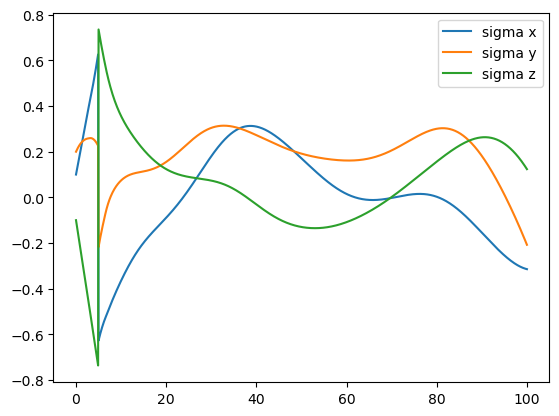

In [85]:
plt.plot(t, X[0, :], label='sigma x')
plt.plot(t, X[1, :], label='sigma y')
plt.plot(t, X[2, :], label='sigma z')
plt.legend()

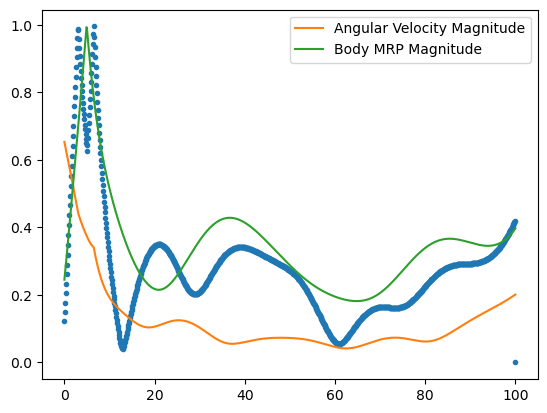

In [83]:
plt.plot(t, norm(sigma_br, axis=0), '.')
plt.plot(t, norm(X[3:,:], axis=0), label='Angular Velocity Magnitude')
plt.plot(t, norm(X[:3,:], axis=0), label='Body MRP Magnitude')
plt.legend()

In [69]:
sigma_br[:,150]

array([-0.12578455, -0.06868286, -0.07534889])

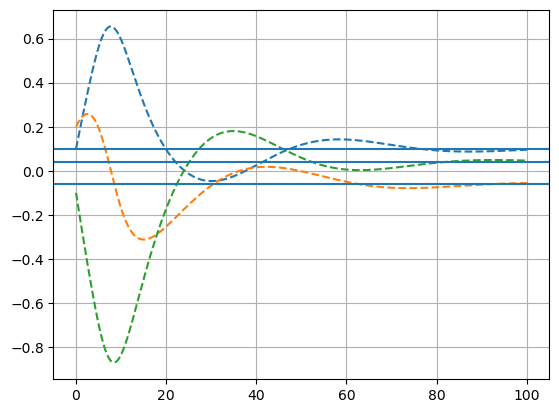

In [282]:
plt.plot(t, state[3,:], '--')
plt.plot(t, state[4,:],'--')
plt.plot(t, state[5,:],'--')
plt.grid()

# plt.plot(t, 0.2*np.sin(0.05 * t), 'r--')
# plt.plot(t, 0.3*np.cos(0.05 * t), 'b--')
# plt.plot(t, -0.3*np.sin(0.05 * t), 'g--')

plt.axhline(0.1)
plt.axhline(-0.06)
plt.axhline(0.04)

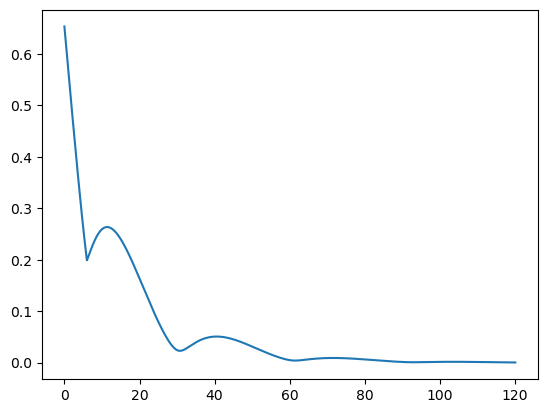

In [177]:
plt.plot(t, norm(state[:3,:], axis=0))

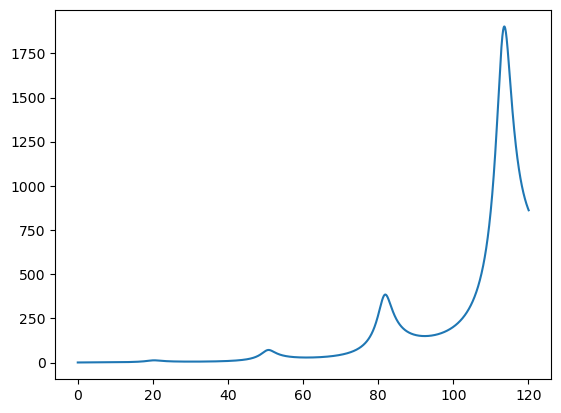

In [176]:
plt.plot(t, norm(state[3:,:], axis=0))

In [67]:
norm = np.linalg.norm
def mrp_sum(g1, g2):
    
    norm1 = norm(g1)
    norm2 = norm(g2)
    
    g_sum = ((1-norm1**2)*g2 +(1-norm2**2)*g1 - 2*np.cross(g1, g2)) / (1 + norm1**2 * norm2**2 - 2 * np.dot(g1, g2))
    return g_sum


def mrp_to_dcm(mrp_vector):
    
    identity = np.identity(3)
    mrp_cross_matrix = tilde(mrp_vector)
    norm_mrp = norm(mrp_vector)
    dcm = identity + (8 * mrp_cross_matrix @ mrp_cross_matrix - 4 * (1 - norm_mrp ** 2) * mrp_cross_matrix) / \
                     ((1 + norm_mrp ** 2) ** 2)
    return dcm
    
def runge_kutta45(f, initial_state, t):
    
    y = np.zeros((2, len(t)))
    y[:,0] = initial_state
    
    for i in range(0, len(t)-1):
        h = t[i+1] - t[i]
        k1 = h * f(y[:, i], t[i])
        k2 = h * f(y[:, i] + k1/2, t[i] + h/2)
        k3 = h * f(y[:, i] + k2/2, t[i] + h/2)
        k4 = h * f(y[:, i] + k3, t[i] + h)
        y[:,i+1] = y[:,i] + 1/6*(k1 + 2*k2 + 2*k3 + k4)
    return y

def state_space_derivative(x, t, inertia_matrix):
    """State space derivative definition.

    First three elements are the omegas, the following three are the MRPs"""

    # Identity matrix
    identity_matrix = np.identity(3)

    # Principal moments of inertia
    i_1 = inertia_matrix[0, 0]
    i_2 = inertia_matrix[1, 1]
    i_3 = inertia_matrix[2, 2]

    # Splitting the state space in omegas and modified rodrigues parameters (MRPs)
    omega_bn_vect = x[0:3]
    mrp_bn_vect = x[-3:]

    # Norm and cross product matrix of the MRPs BN
    mrp_bn_cross_matrix = tilde(mrp_bn_vect)
    mrp_bn_norm = np.linalg.norm(mrp_bn_vect)

    mrp_rn_vect, omega_rn_vect_rframe = mrp_and_omega_rn(t)

    omega_rn_dot_vect = omega_dot_rn(t, h)
    # TODO: the time step should be an input of the state_space_derivative function

    # MRPs BR and check their norm is not bigger than 1, otherwise the shadow set is consider
    mrp_br_vect = mrp_sum(-mrp_rn_vect, mrp_bn_vect)
    mrp_br_norm = np.linalg.norm(mrp_br_vect)
    if mrp_br_norm > 1:
        mrp_br_vect = -mrp_br_vect / (mrp_br_norm ** 2)

    # DCM_BR
    dcm_br = mrp_to_dcm(mrp_br_vect)

    # omega_rn in the b_frame
    omega_rn_vect = np.dot(dcm_br, omega_rn_vect_rframe)

    # omega_br
    omega_br_vect = omega_bn_vect - omega_rn_vect

    if t == 40:
        print("sigma_br norm at ", t, ": ", np.linalg.norm(mrp_br_vect))

    # Control vector
    k = 5
    p = 10
    omega_bn_cross_matrix = tilde(omega_bn_vect)
    u = - k * mrp_br_vect - p * np.dot(identity_matrix, omega_br_vect) + \
        np.dot(inertia_matrix, (omega_rn_dot_vect - np.cross(omega_bn_vect, omega_rn_vect))) + \
        omega_bn_cross_matrix.dot(inertia_matrix).dot(omega_bn_vect)

    # Computation of the MRPs kinematic differential equation and omegas differential equations
    mrp_bn_dot_vect = 0.25 * np.dot(((1 - mrp_bn_norm ** 2) * identity_matrix + 2 * mrp_bn_cross_matrix +
                                     2 * np.outer(mrp_bn_vect, mrp_bn_vect)), omega_bn_vect)
    omega_1_bn_dot = (i_2 - i_3) / i_1 * omega_bn_vect[2] * omega_bn_vect[1] + u[0] / i_1
    omega_2_bn_dot = (i_3 - i_1) / i_2 * omega_bn_vect[0] * omega_bn_vect[2] + u[1] / i_2
    omega_3_bn_dot = (i_1 - i_2) / i_3 * omega_bn_vect[1] * omega_bn_vect[0] + u[2] / i_3
    omega_bn_dot_vect = np.array([omega_1_bn_dot, omega_2_bn_dot, omega_3_bn_dot])

    # Assembly of the state space derivative vector as the three omegas_dot and teh three MRPs_dot
    x_dot = np.insert(omega_bn_dot_vect, 3, mrp_bn_dot_vect, axis=0)
    return x_dot


def sigma_rn(t):
    f = 0.05
    sig_rn = np.array([0.2 * np.sin(f * t), 0.3 * np.cos(f * t), -0.3 * np.sin(f * t)])
    return sig_rn


def sigma_rn_prime(t):
    f = 0.05
    sig_rn_prime = f * np.array([0.2 * np.cos(f * t), -0.3 * np.sin(f * t), -0.3 * np.cos(f * t)])
    return sig_rn_prime


def mrp_and_omega_rn(t):
    identity_mat = np.identity(3)
    # MRPs RN (and derivative)
    mrp_rn = sigma_rn(t)
    mrp_rn_norm = np.linalg.norm(mrp_rn)
    mrp_rn_cross_matrix = tilde(mrp_rn)
    mrp_rn_dot = sigma_rn_prime(t)

    # B matrix of the MRPs kinematic differential equation (Eq. 3.155)
    b_matrix = 0.25 * ((1 - mrp_rn_norm ** 2) * identity_mat + 2 * mrp_rn_cross_matrix + 2 * np.outer(mrp_rn, mrp_rn))

    # omega_rn in r-frame, computed as (Eq. 3.158)
    omega_rn_rframe = 4 / ((1 + mrp_rn_norm ** 2) ** 2) * np.dot(b_matrix.transpose(), mrp_rn_dot)

    return mrp_rn, omega_rn_rframe


def omega_dot_rn(t, tstep):
    _, omega_rn_before = mrp_and_omega_rn(t-tstep)
    _, omega_rn_after = mrp_and_omega_rn(t+tstep)
    omega_rn_dot = (omega_rn_after - omega_rn_before) / (2 * tstep)
    return omega_rn_dot


# Initial conditions
omega_bn_zero = np.deg2rad(np.array([30, 10, -20]))
sigma_bn_zero = np.array([0.1, 0.2, -0.1])
state_vector_initial = np.insert(omega_bn_zero, 3, sigma_bn_zero, axis=0)

# Inertia matrix
inertia_mat = np.diag(np.array([100, 75, 80]))

# Time interval
h = 0.01
initial_t = 0
final_t = 40
t_vect, omega = runge_kutta(state_space_derivative, initial_t, final_t, state_vector_initial, h, inertia_mat)


    

In [51]:
inertia = np.array([
    [100,0,0],
    [0,75,0],
    [0,0,80]
])

sigma0 = MRP(0.1,0.2,-0.1)
omega0 = np.deg2rad(np.array([30,10,-20]))

K = 5
P = 10 * np.eye(3)
L = 0


t0, tf = 0, 30
step = 0.01
length = int(round(tf-t0)/step)
time = np.linspace(t0, tf+step, length)



results = []

control_history = []
sigma = sigma0
omega = omega0
omega_r = np.array([0,0,0])
for t in time:
    
    gyroscopic = tilde(omega) @ (inertia@omega)
    control = -K*sigma.vector - P@omega + inertia@(omega_r - tilde(omega)@omega_r) + gyroscopic - L
    
    omega_dot = np.linalg.inv(inertia) @ (-gyroscopic + control + L)
    omega += omega_dot * step
    sigma_dot = 0.25 * sigma.b_matrix @ omega
    
    sigma_new = sigma.vector + sigma_dot
    sigma = MRP(*sigma_new)

print(sigma)
    
    

MRP<[nan nan nan]>


/var/folders/fr/6_7v365d1sd712jpqdkltk4w0000gn/T/ipykernel_2959/221276785.py:35: RuntimeWarning: overflow encountered in matmul
  sigma_dot = 0.25 * sigma.b_matrix @ omega
/var/folders/fr/6_7v365d1sd712jpqdkltk4w0000gn/T/ipykernel_2959/221276785.py:33: RuntimeWarning: invalid value encountered in matmul
  omega_dot = np.linalg.inv(inertia) @ (-gyroscopic + control + L)
/Users/sam/Documents/optimization/refactor/mrp.py:29: RuntimeWarning: invalid value encountered in scalar add
  [1-norm_2+2*s1**2, 2*(s1*s2-s3), 2*(s1*s3+s2)],
/Users/sam/Documents/optimization/refactor/mrp.py:29: RuntimeWarning: invalid value encountered in scalar subtract
  [1-norm_2+2*s1**2, 2*(s1*s2-s3), 2*(s1*s3+s2)],
/Users/sam/Documents/optimization/refactor/mrp.py:30: RuntimeWarning: invalid value encountered in scalar add
  [2*(s2*s1+s3), 1-norm_2+2*s2**2, 2*(s2*s3-s1)],
/Users/sam/Documents/optimization/refactor/mrp.py:30: RuntimeWarning: invalid value encountered in scalar subtract
  [2*(s2*s1+s3), 1-norm_2+2*

In [284]:
np.sqrt(5)*np.sqrt([100, 75, 80])

array([22.36067977, 19.36491673, 20.        ])

In [ ]:
def state_derivatives(X, t, time_step, inertia_matrix, external_torque, sigma_history, initial_state):
    
    identity = np.identity(3)
    
    # Principal moments of inertia
    i_1 = inertia_matrix[0, 0]
    i_2 = inertia_matrix[1, 1]
    i_3 = inertia_matrix[2, 2]
    
    omega_bn = X[0:3]
    mrp_bn = X[3:]
    
    mrp_rn, omega_rn_rframe = mrp_omega_rn(t)
    omega_rn_dot_vect = omega_rn_dot(t, time_step)
    
    mrp_br = mrp_sum(-mrp_rn, mrp_bn)
    mrp_br_norm = norm(mrp_br)
    if mrp_br_norm > 1:
        mrp_br = -mrp_br / (mrp_br_norm**2)
        
    dcm_br = mrp_to_dcm(mrp_br)
    omega_rn = dcm_br @ omega_rn_rframe
    omega_br = omega_bn - omega_rn
    omega_bn_cross = tilde(omega_bn)
    
    if np.abs(t-45) < 1e-2:
        print('*'*50)
        print("sigma_br norm at", t, ": ", norm(mrp_br))
        print("omega_br norm at", t, ": ", norm(omega_br))
    
    # Control Vector
    K = 5
    P = 10
    Ki = 0.005

    sigma_history[:, int(t/time_step)] = mrp_br
    
    # u = -K*mrp_bn - P*omega_bn + omega_bn_cross @ inertia_matrix @ omega_bn
    
    omega_bn_0 = initial_state[:3]
    _, omega_rn_0 = mrp_omega_rn(0)
    omega_br_0 = omega_bn_0 - omega_rn_0
    
    z = K * time_step * np.sum(sigma_history, axis=1) + inertia_matrix @ (omega_br - omega_br_0)
            
    u = -K*mrp_br - P*omega_br + inertia_matrix @ (omega_rn_dot_vect - omega_bn_cross @ omega_rn) \
        + omega_bn_cross @ inertia_matrix @ omega_bn - P*Ki*z
        
    # u = -K*mrp_br - P*omega_br
    
    mrp_bn_dot = 0.25 * b_matrix_mrp(mrp_bn) @ omega_bn
    omega_1_bn_dot = (i_2 - i_3) / i_1 * omega_bn[2] * omega_bn[1] + (u[0] + external_torque[0]) / i_1
    omega_2_bn_dot = (i_3 - i_1) / i_2 * omega_bn[0] * omega_bn[2] + (u[1] + external_torque[1]) / i_2
    omega_3_bn_dot = (i_1 - i_2) / i_3 * omega_bn[1] * omega_bn[0] + (u[2] + external_torque[2]) / i_3
    omega_bn_dot = np.array([omega_1_bn_dot, omega_2_bn_dot, omega_3_bn_dot])
    
    x_dot = np.insert(omega_bn_dot, 3, mrp_bn_dot, axis=0)
    return x_dot

def sigma_rn(t):

    return np.array([0,0,0])
    
def sigma_rn_dot(t):

    return np.array([0,0,0])

def mrp_omega_rn(t):
    
    mrp_rn = sigma_rn(t)
    mrp_rn_norm = norm(mrp_rn)
    b_matrix_rn = b_matrix_mrp(mrp_rn)
    b_matrix_rn_inv = np.transpose(b_matrix_rn) / (1 + mrp_rn_norm**2)
    
    omega_rn = 4 * b_matrix_rn_inv @ sigma_rn_dot(t)
    
    return mrp_rn, omega_rn

def omega_rn_dot(t, time_step):
    
    _, omega_rn_before = mrp_omega_rn(t - time_step)
    _, omega_rn_after = mrp_omega_rn(t + time_step)
    omega_rn_dot = (omega_rn_after - omega_rn_before) / (2 * time_step)
    return omega_rn_dot
    
    
    


def runge_kutta45(f, t, initial_state, **kwargs):
    
    X = np.zeros((6, len(t)))
    X[:,0] = initial_state
    
    for i in range(0, len(t)-1):
        h = t[i+1] - t[i]
        k1 = h * f(X[:, i], t[i], initial_state=initial_state, **kwargs)
        k2 = h * f(X[:, i] + k1/2, t[i] + h/2, initial_state=initial_state, **kwargs)
        k3 = h * f(X[:, i] + k2/2, t[i] + h/2, initial_state=initial_state, **kwargs)
        k4 = h * f(X[:, i] + k3, t[i] + h, initial_state=initial_state, **kwargs)
        X[:,i+1] = X[:,i] + 1/6*(k1 + 2*k2 + 2*k3 + k4)
    return X

# Initial Conditions
omega_bn_0 = np.deg2rad([3,1,-2])
sigma_bn_0 = np.array([0.1,0.2,-0.1])


initial_state = np.insert(omega_bn_0, 3, sigma_bn_0, axis=0)

inertia_matrix = np.diag(np.array([100,75,80]))

external_torque = np.array([0,0,0])

# Time interval
h = 0.03
t0 = 0
tf = 100
t = np.linspace(t0, tf+h, int(tf/h))
sigmas = np.zeros((3, len(t)))
sigmas[:,0] = sigma_bn_0

state = runge_kutta45(state_derivatives, t,
                    initial_state,
                    time_step=h,
                    inertia_matrix=inertia_matrix,
                    external_torque = external_torque)
